In [1]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [3]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized_fetal/Mitral valve.rds')

In [4]:
table(dataobj$cell_type)


Cardiomyocyte cell   Endothelial cell         Fibroblast          Mast cell 
                 1                 21                 88                  1 
         Myelocyte 
                13 

# Fb

In [5]:
ct = "Fibroblast"

In [6]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [7]:
df <- df[apply(df,1,mad)>0,]

In [8]:
dim(df)

[1] 3094   88

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

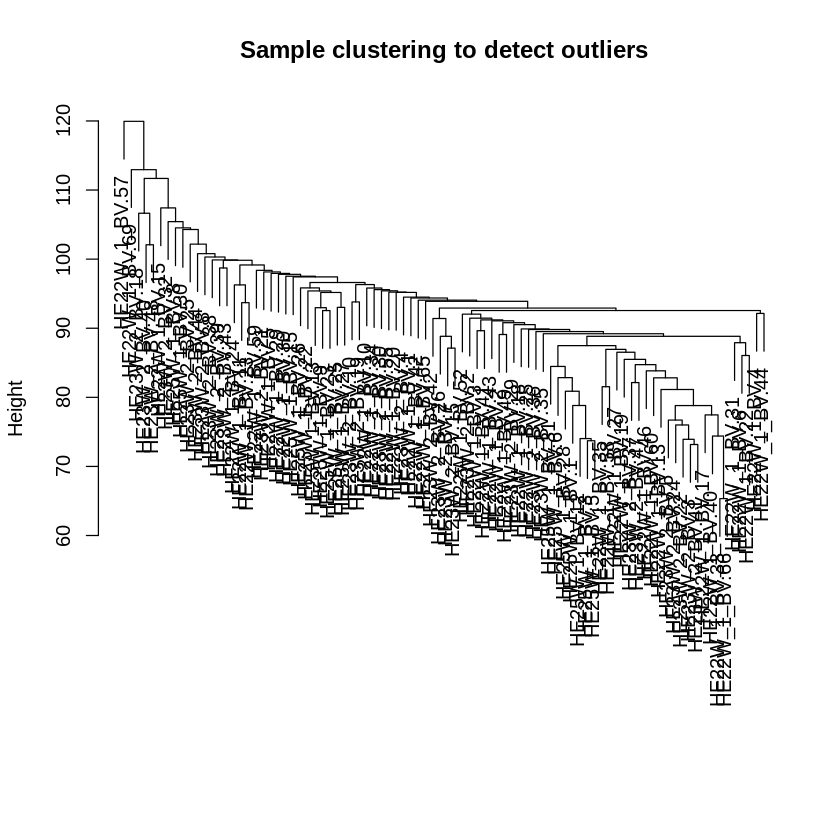

In [9]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [10]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 341 genes from module 2 because their KME is too low.
     ..removing 25 genes from module 4 because their KME is too low.
     ..removing 11 genes from module 5 because their KME is too low.
     ..removing 7 genes from module 7 because their KME is too low.
     ..removing 7 genes from module 8 because their KME is too low.
     ..removing 11 genes from module 9 because their KME is too low.
     ..removing 3 genes from module 11 beca

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


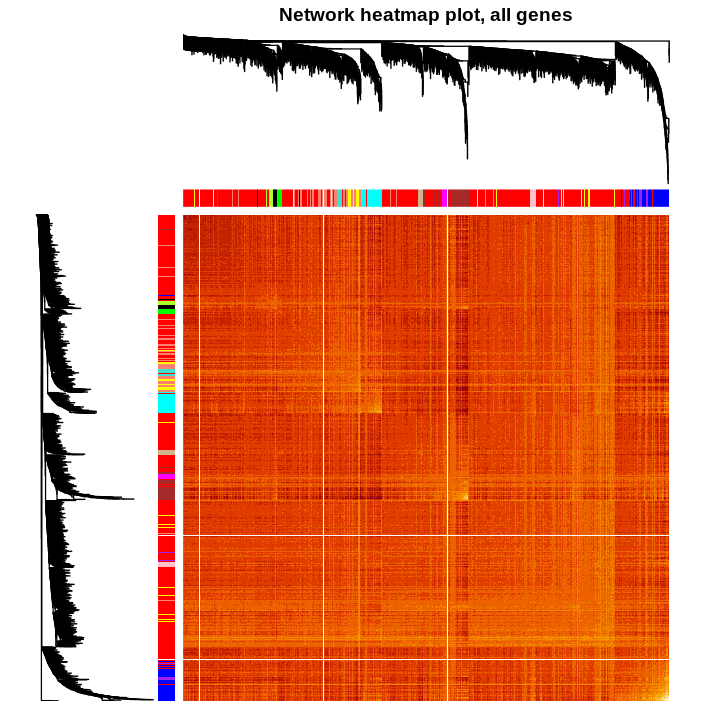

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

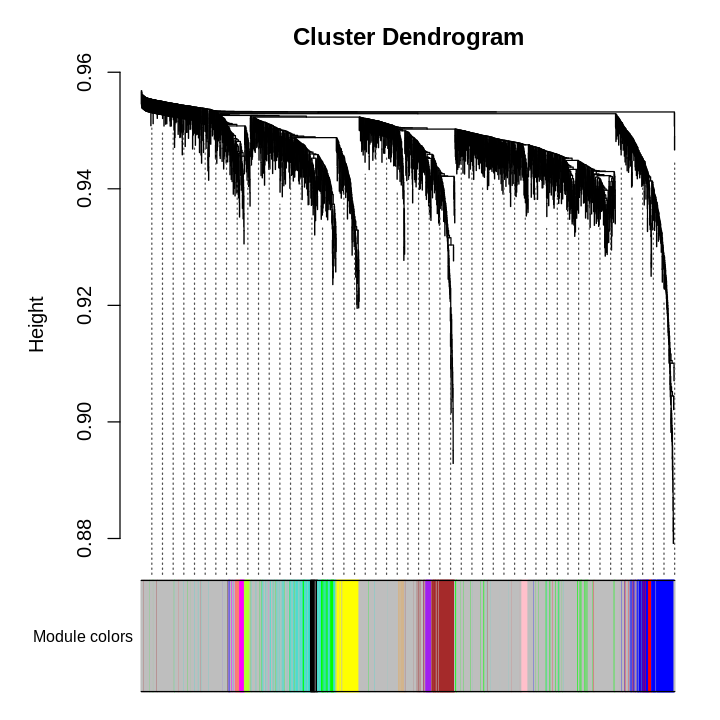

In [12]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [13]:
colors <- table(net$colors)
colors


      black        blue       brown       green greenyellow        grey 
         39         198         143         117          33        2017 
    magenta        pink      purple         red      salmon         tan 
         35          35          34          43          27          31 
  turquoise      yellow 
        216         126 

In [14]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [15]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','MV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# EC

In [16]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [17]:
df <- df[apply(df,1,mad)>0,]

In [18]:
dim(df)

[1] 3094   88

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

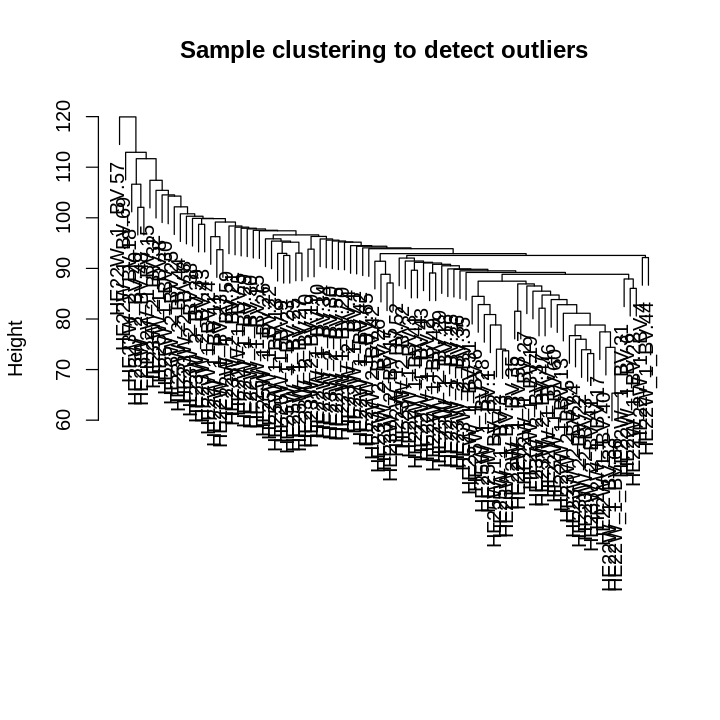

In [19]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [20]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 341 genes from module 2 because their KME is too low.
     ..removing 25 genes from module 4 because their KME is too low.
     ..removing 11 genes from module 5 because their KME is too low.
     ..removing 7 genes from module 7 because their KME is too low.
     ..removing 7 genes from module 8 because their KME is too low.
     ..removing 11 genes from module 9 because their KME is too low.
     ..removing 3 genes from module 11 beca

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


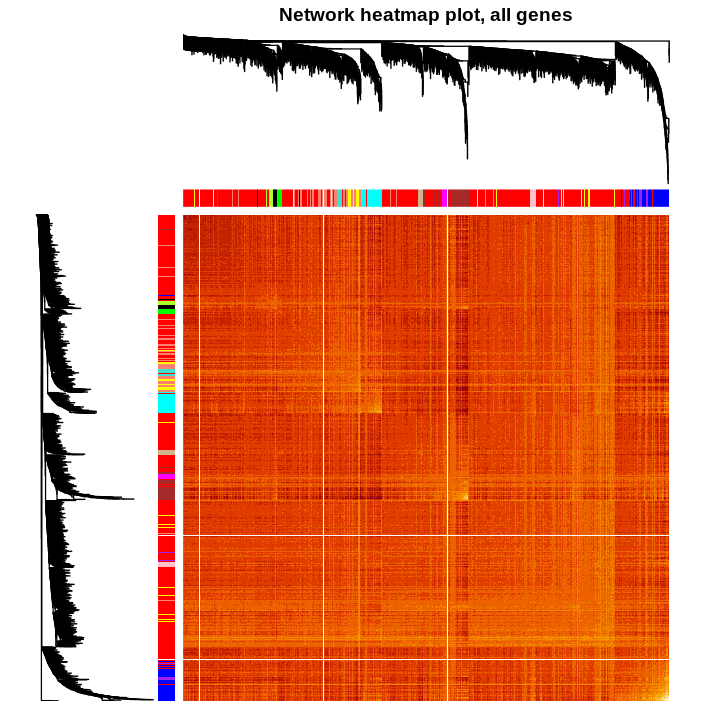

In [21]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

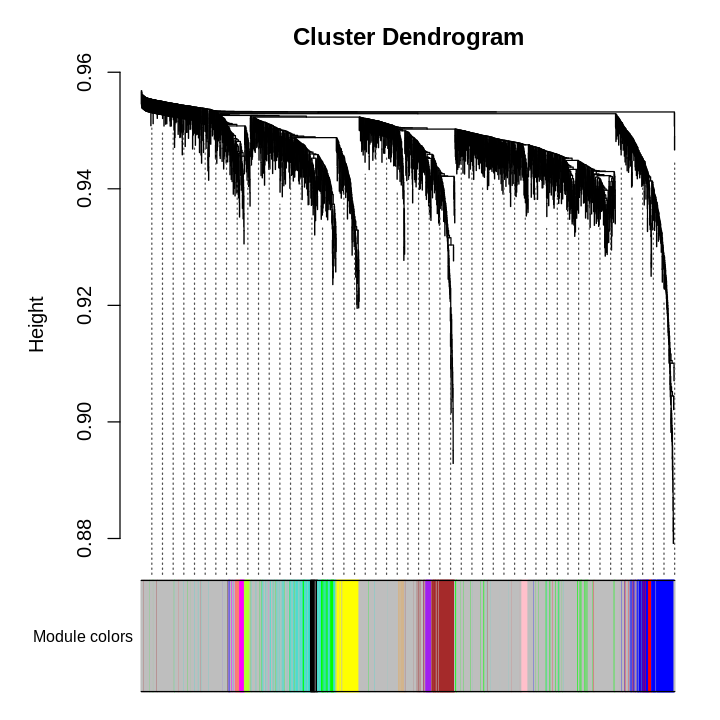

In [22]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [23]:
colors <- table(net$colors)
colors


      black        blue       brown       green greenyellow        grey 
         39         198         143         117          33        2017 
    magenta        pink      purple         red      salmon         tan 
         35          35          34          43          27          31 
  turquoise      yellow 
        216         126 

In [24]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [25]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','MV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Myelo

In [26]:
ct = "Myelocyte"

In [27]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [28]:
df <- df[apply(df,1,mad)>0,]

In [29]:
dim(df)

[1] 3764   13

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

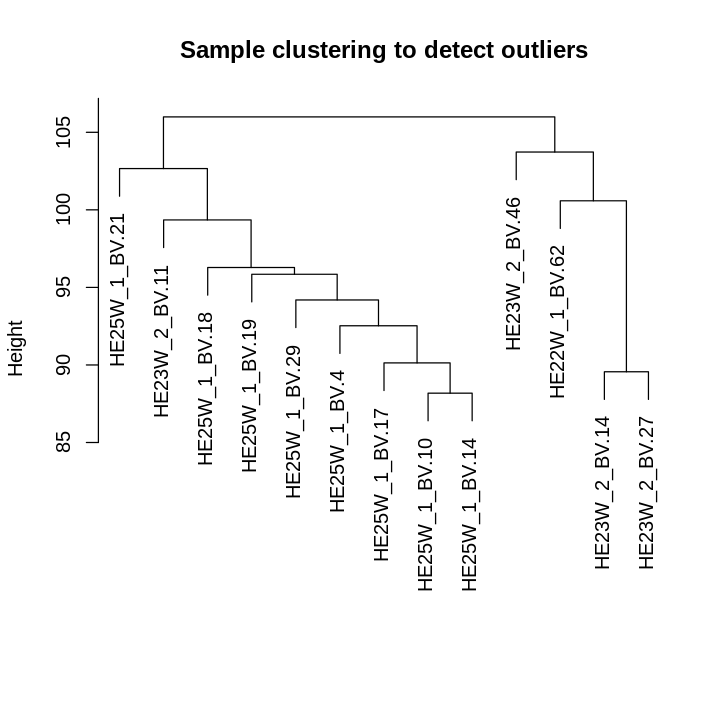

In [30]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [31]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 3 genes from module 1 because their KME is too low.
     ..removing 2 genes from module 4 because their KME is too low.
     ..removing 2 genes from module 7 because their KME is too low.
     ..removing 15 genes from module 10 because their KME is too low.
     ..removing 2 genes from module 11 because their KME is too low.
     ..removing 1 genes from module 19 because their KME is too low.
     ..removing 2 genes from module 23 becau

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


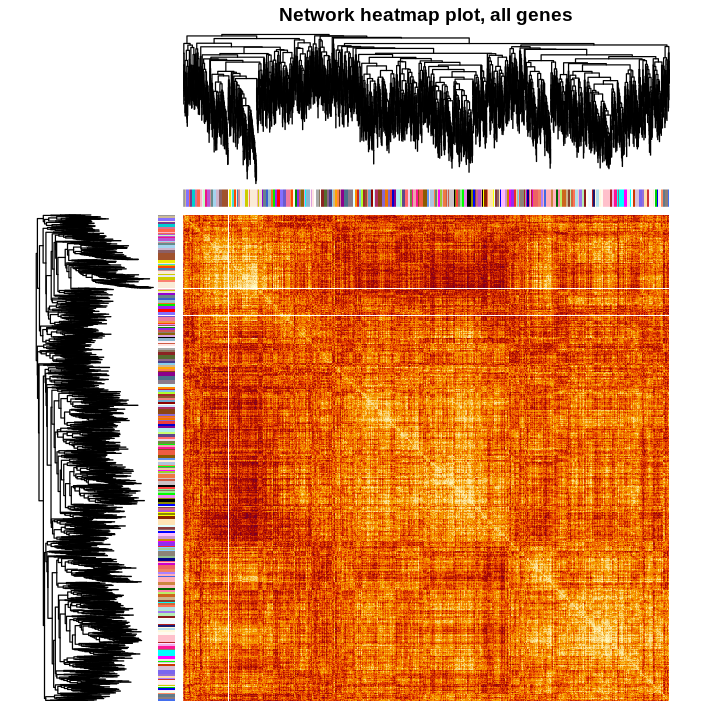

In [32]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

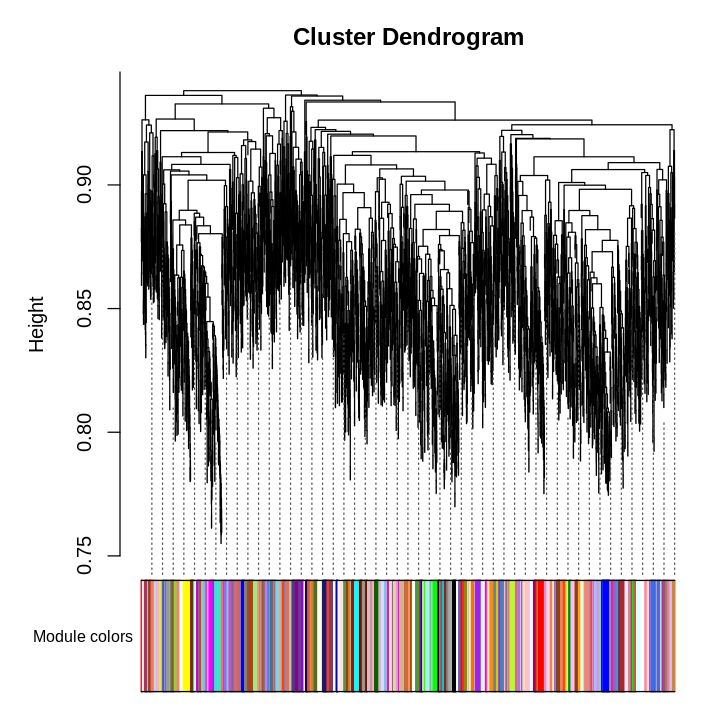

In [33]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [34]:
colors <- table(net$colors)
colors


      aliceblue    antiquewhite   antiquewhite1   antiquewhite2   antiquewhite4 
             12              10              15              18              21 
        bisque4           black            blue           blue1           blue2 
             23              46              64              11              19 
          blue3           blue4      blueviolet           brown          brown1 
             14              16              16              58              14 
         brown2          brown3          brown4      chocolate2      chocolate3 
             19              11              23              10              13 
     chocolate4           coral          coral1          coral2          coral3 
             15              18              21              21              18 
         coral4  cornflowerblue        cornsilk            cyan  darkgoldenrod4 
             15              12              10              34              11 
      darkgreen        dark

In [35]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [36]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','MV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}